<a href="https://colab.research.google.com/github/Fadinrsultan/regression_real_data_set/blob/main/CIFAR_10_Classification_Using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad


 # 1. Load the CIFAR-10 dataset from tf.keras.datasets
    #    It automatically downloads the dataset if it's not already cached.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

    # CIFAR-10 has:
    # - 50,000 training images
    # - 10,000 testing images
    # - Each image is 32x32x3 (color), with labels 0 through 9

    # 2. Preprocess the data
    #    - Convert labels from shape (num_samples, 1) to (num_samples, ) for easier handling
    #    - Scale the images to [0, 1]
y_train = y_train.squeeze()  # (50000,) instead of (50000,1)
y_test = y_test.squeeze()    # (10000,) instead of (10000,1)

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

    # 3. Define an MLP model in Keras
    #    Note: MLP is often too simple for CIFAR-10, but this is for demonstration.
model = Sequential([
        Flatten(input_shape=(32, 32, 3)),   # Flatten the 32x32x3 images into 1D
        Dense(512, activation='relu'),
        Dropout(0.3),                      # Helps reduce overfitting
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(10, activation='softmax')    # 10 classes in CIFAR-10
    ])

    # 4. Compile the model
model.compile(
        optimizer=Adagrad(learning_rate=0.01),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # 5. Train the model
    #    You can adjust epochs and batch size as needed.
model.fit(
        X_train,
        y_train,
        validation_split=0.1,  # 10% of the training data used for validation
        epochs=100,
        batch_size=128
    )

    # 6. Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")




Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.2252 - loss: 2.1161 - val_accuracy: 0.3412 - val_loss: 1.8521
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.3303 - loss: 1.8667 - val_accuracy: 0.3736 - val_loss: 1.7888
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.3623 - loss: 1.7874 - val_accuracy: 0.3602 - val_loss: 1.7911
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.3819 - loss: 1.7392 - val_accuracy: 0.4192 - val_loss: 1.6652
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.3981 - loss: 1.6956 - val_accuracy: 0.4226 - val_loss: 1.6308
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - accuracy: 0.4113 - loss: 1.6645 - val_accuracy: 0.4260 - val_loss: 1.6210
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4214 - loss: 1.6375 - val_accuracy: 0.4368 - val_loss: 1.6016
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4307 - loss: 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Sample true label: 6
Sample predicted class: 6


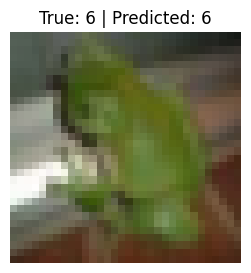

In [20]:
import matplotlib.pyplot as plt

# 7. Make a prediction on one sample
sample_idx = 7  # change index to see different samples
sample_image = np.expand_dims(X_test[sample_idx], axis=0)
prediction = model.predict(sample_image)
predicted_class = np.argmax(prediction[0])

print(f"Sample true label: {y_test[sample_idx]}")
print(f"Sample predicted class: {predicted_class}")

# --- Show the image with matplotlib ---
plt.figure(figsize=(4, 3))                             # Create a new figure
plt.imshow(X_test[sample_idx])          # Display the sample image
plt.title(f"True: {y_test[sample_idx]} | Predicted: {predicted_class}")
plt.axis('off')                         # Hide axis ticks
plt.show()                              # Render the plot